# <font color=#025dfa> Sosyal Medya Reklamlarının Sınıflandırılması - Classification of Social Media Ads

TR = Her yorum satırı kendisini üstündeki koda aittir. İlk olarak Türkçe, son olarak İngilizce yazıldı.

EN = Each comment line belongs to the code above it. It was first written in Turkish and lastly in English.

Kaynak/Source = https://thecleverprogrammer.com/2021/06/15/social-media-ads-classification-with-machine-learning/

In [14]:
#pip install pycaret

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import nltk
import warnings
warnings.filterwarnings('ignore')
import re

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.preprocessing import normalize, scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from pycaret.classification import*

In [16]:
pd.set_option("display.max_columns",None)
# TR = En fazla kaç sütun olduğunu gösteriyor.
# EN = It shows the maximum number of columns.

In [17]:
df=pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/social.csv')

In [18]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


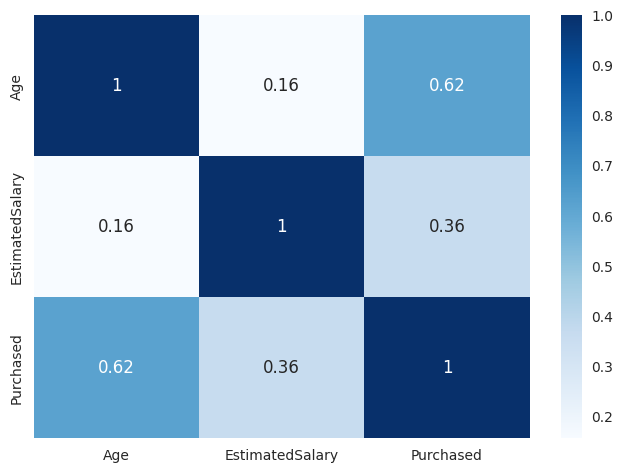

In [19]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Blues');

In [20]:
abs(df.corr(numeric_only=True)['Purchased']).sort_values(ascending=False)

Purchased          1.000000
Age                0.622454
EstimatedSalary    0.362083
Name: Purchased, dtype: float64

In [21]:
setup(df,target='Purchased')

,Description,Value
0,Session id,3476
1,Target,Purchased
2,Target type,Binary
3,Original data shape,"(400, 3)"
4,Transformed data shape,"(400, 3)"
5,Transformed train set shape,"(280, 3)"
6,Transformed test set shape,"(120, 3)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


In [22]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9143,0.9600,0.8900,0.8805,0.8777,0.8122,0.8203,0.0350
catboost,CatBoost Classifier,0.9036,0.9522,0.9000,0.8517,0.8657,0.7913,0.8023,0.9570
nb,Naive Bayes,0.8964,0.9528,0.8300,0.8783,0.8463,0.7693,0.7763,0.0380
xgboost,Extreme Gradient Boosting,0.8964,0.9314,0.8700,0.8563,0.8513,0.7729,0.7848,0.0680
lightgbm,Light Gradient Boosting Machine,0.8929,0.9367,0.8600,0.8527,0.8448,0.7642,0.7758,0.0530
rf,Random Forest Classifier,0.8893,0.9300,0.8800,0.8356,0.8495,0.7627,0.7718,0.2130
et,Extra Trees Classifier,0.8821,0.9178,0.8600,0.8343,0.8343,0.7440,0.7571,0.1710
gbc,Gradient Boosting Classifier,0.8750,0.9422,0.8200,0.8416,0.8184,0.7246,0.7357,0.1800
dt,Decision Tree Classifier,0.8679,0.8544,0.8100,0.8347,0.8056,0.7077,0.7210,0.0360
ada,Ada Boost Classifier,0.8571,0.9192,0.7700,0.8345,0.7906,0.6836,0.6940,0.1580


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [23]:
best_model=create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9286,0.9611,0.9000,0.9000,0.9000,0.8444,0.8444
1,0.7857,0.8722,0.7000,0.7000,0.7000,0.5333,0.5333
2,0.7857,0.8778,0.4000,1.0000,0.5714,0.4615,0.5477
3,0.8571,0.9000,0.8000,0.8000,0.8000,0.6889,0.6889
4,0.8929,0.9778,0.7000,1.0000,0.8235,0.7500,0.7746
5,0.7500,0.8389,0.6000,0.6667,0.6316,0.4432,0.4446
6,0.7857,0.8444,0.6000,0.7500,0.6667,0.5116,0.5185
7,0.8214,0.9778,0.6000,0.8571,0.7059,0.5833,0.6025
8,0.9286,0.9778,0.9000,0.9000,0.9000,0.8444,0.8444


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

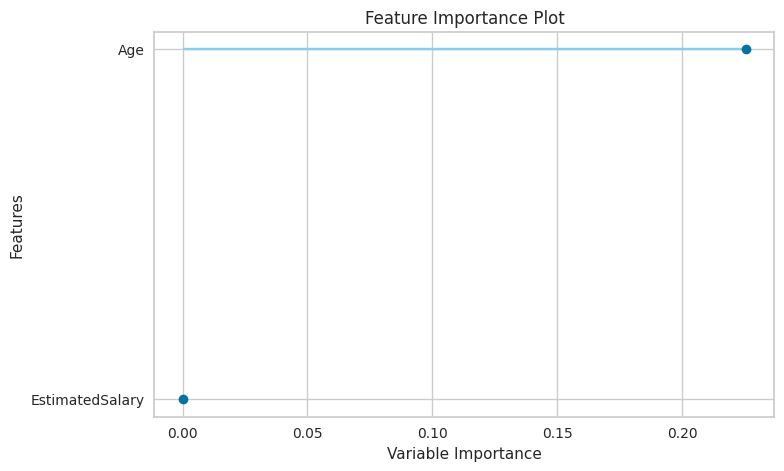

In [24]:
plot_model(best_model,plot='feature')

## <font color='#0F52BA'> Öznitelik Mühendisliği - Feature Engineering

### <font color=#007fff> Model - Modelling

In [26]:
x = np.array(df[["Age", "EstimatedSalary"]])
y = np.array(df[["Purchased"]])

In [27]:
x=scale(x)

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
# TR = modelimizi eğittik.
# EN = We trained our model.

In [29]:
input_dim = 2
model=Sequential()
model.add(Dense(240,activation='relu', input_shape=(input_dim,)))
# TR = Bu katman, tüm giriş nöronlarına bağlantı kurar ve her nöronun ağırlıklarını öğrenir. 240 nöron var.
# Aktivasyon fonksiyonunu ReLU (Rectified Linear Unit) olarak ayarlar. ReLU fonksiyonu, negatif değerleri sıfıra dönüştürür ve pozitif değerleri olduğu gibi bırakır.
# EN = This layer connects all input neurons and learns the weights of each neuron. There are 240 neurons.
# Sets the activation function to ReLU (Rectified Linear Unit). The ReLU function converts negative values ​​to zero and leaves positive values ​​as is.

model.add(BatchNormalization())
# TR = Bu katman, modelin eğitim sürecini daha stabil hale getirmek için kullanılır.
# EN = This layer is used to make the training process of the model more stable.

model.add(Dropout(0.5))
# TR = Derin öğrenme modelinde aşırı uyumu (overfitting) azaltmak için kullanılır.
# EN = It is used to reduce overfitting in the deep learning model.

model.add(Dense(120, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(24, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(12, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(1,activation='sigmoid'))
# TR = Sigmoid aktivasyon fonksiyonu, her bir nöronun çıkışını 0 ile 1 arasında bir değere dönüştürür.
# Bu, özellikle ikili sınıflandırma problemlerinde her iki sınıfa ait olasılıkları tahmin etmek için uygundur.
# EN = The sigmoid activation function transforms the output of each neuron into a value between 0 and 1.
# This is particularly suitable for estimating probabilities of belonging to both classes in binary classification problems.

# TR = activation='sigmoid' iki sınıftan birine ait olup olmadığını tahmin etmek için kullanılır. Örneğin, bir e-postanın spam olup olmadığını sınıflandırmak.
# EN = activation='sigmoid' is used to predict whether an email belongs to one of two classes. For example, to classify whether an email is spam or not.

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# TR = loss='binary_crossentropy': İkili sınıflandırma problemleri için uygun bir kayıp fonksiyonudur. İki sınıf arasında ayrım yapmaya çalışırken modelin tahminlerinin ne kadar iyi olduğunu ölçer.
# EN = loss='binary_crossentropy': A loss function suitable for binary classification problems. It measures how well the model's predictions are when trying to distinguish between two classes.

# TR = optimizer='adam': Adam (Adaptive Moment Estimation) optimizasyon algoritması, modelin ağırlıklarını güncellerken kullanılan bir yöntemdir.
# EN = optimizer='adam': Adam (Adaptive Moment Estimation) optimization algorithm is a method used when updating the weights of the model.

# TR = metrics=['accuracy']: Modelin performansını değerlendirmek için kullanılan bir ölçümdür. Doğru sınıflandırılan örneklerin toplam örneklere oranını hesaplar.
# EN = metrics=['accuracy']: A metric used to evaluate the performance of the model. It calculates the ratio of correctly classified examples to total examples.

In [30]:
history=model.fit(x,y,epochs=50,batch_size=32, validation_split=.20,verbose=1)
#epochs=Eğitim verilerinin tamamının modele aktarıldığı ve ardından modelin güncellenmesi işleminin bir kez gerçekleştirildiği bir döngü olarak tanımlanabilir.
#batch_size=Bir şeferde kaç tane satır alacağını ve hesaplayacağını şöylüyor
#validation_split=train_test_split gibi
#verbose=Modelin eğitimi sırasında konsola (veya diğer çıktı cihazlarına) yazdırılan bilgi miktarını kontrol eder.

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.5502 - loss: 1.0146 - val_accuracy: 0.4375 - val_loss: 0.6894
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5496 - loss: 0.9193 - val_accuracy: 0.3625 - val_loss: 0.7044
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6026 - loss: 0.8070 - val_accuracy: 0.3625 - val_loss: 0.7240
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6011 - loss: 0.8413 - val_accuracy: 0.3625 - val_loss: 0.7407
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5679 - loss: 0.8262 - val_accuracy: 0.3625 - val_loss: 0.7529
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6317 - loss: 0.7704 - val_accuracy: 0.3625 - val_loss: 0.7642
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6605 - loss: 0.7199 - val_accuracy: 0.3625 - val_loss: 0.7758
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5997 - loss: 0.7916 - val_accuracy: 0.3625 - val_loss

In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 240)            │           720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 240)            │           960 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 240)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 120)            │        28,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 120)            │           480 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         7,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 24)             │         1,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24)             │            96 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 12)             │            48 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            26 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 2)              │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,517 (474.68 KB)

 Trainable params: 40,197 (157.02 KB)

 Non-trainable params: 924 (3.61 KB)

 Optimizer params: 80,396 (314.05 KB)

In [32]:
test_loss, test_acc = model.evaluate(x_test, y_test)
# TR = test_loss değişkeni, test verileri üzerinde hesaplanan kayıp değerini içerir. test_acc değişkeni, test verileri üzerinde hesaplanan doğruluk değerini içerir.
# EN = The test_loss variable contains the loss value calculated on the test data. The test_acc variable contains the accuracy value calculated on the test data.

print(f"Test doğruluğu: {test_acc:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9430 - loss: 0.3958 
Test doğruluğu: 0.9250


In [33]:
pred=model.predict(x_test)
# TR = modeli x_test ile predict özelliği ile tahmin ettik. predict=tahmin demek. Dahmin edip pred eşitledik.
# EN = We predicted the model with x_test and the predict feature. predict=means prediction. We guessed and equalized the pred.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


In [34]:
pred = (pred > 0.5).astype(int)

In [35]:
accuracy_score(y_test, pred)
# TR = accuracy_score fonksiyonu ile y_test, pred kullanarak sonucumuzu bulduk.
# EN = We found our result using the accuracy_score function and y_test, pred.

0.925

In [36]:
confusion_matrix(y_test, pred)
# TR = confusion_matrix fonksiyonu ile y_test, pred kullanarak ne kadarını yanlış tahmin ettiğimizi buluyoruz
# EN = Using the confusion_matrix function and y_test, pred, we find out how much we guessed wrong.

# TR = 4 sayı değeri veriyor bize. Sol üst ve sağ alt doğru tahmin, sağ üst ve sol alt yanlış tahmin.
# EN = It gives us 4 number values. Upper left and lower right are correct guesses, upper right and lower left are incorrect guesses.

array([[52,  0],
       [ 6, 22]])

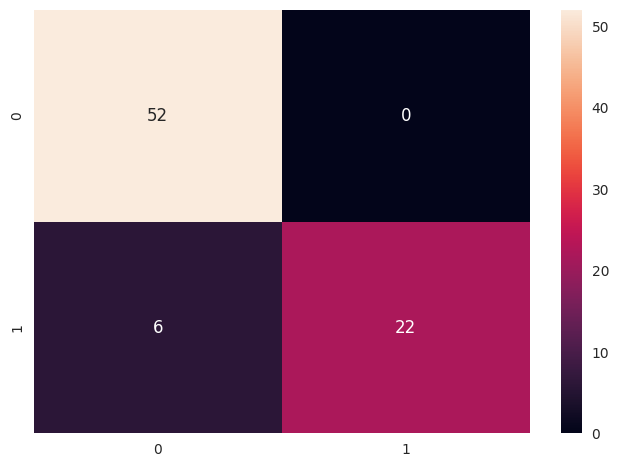

In [37]:
sns.heatmap(confusion_matrix(y_test, pred),annot=True);
# TR = Yukarıdakinin görsel versiyonu.
# EN = Visual version of the above.

In [38]:
print(classification_report(y_test, pred))
# TR = print içinde yazdık yoksa sayıların sıralanması bozuluyor.
# EN = We wrote it in print, otherwise the order of the numbers will be disrupted.

# TR = classification_report ile y_test, pred kullanarak precision, recall, f1-score ve support ulaştık.
# EN = We achieved precision, recall, f1-score and support using classification_report and y_test, pred.

# TR = Precision (Kesinlik): Doğru olarak pozitif tahmin edilen örneklerin, toplam pozitif tahmin edilen örnekler içindeki oranını gösterir. Yani, modelin pozitif sınıfı ne kadar doğru tahmin ettiğini ölçer.
# EN = Precision (Precision): It shows the ratio of correctly predicted positive samples among the total positive predicted samples. That is, it measures how accurately the model predicts the positive class.

# TR = Recall (Duyarlılık): Gerçek pozitif örneklerin, toplam pozitif örnekler içindeki oranını gösterir. Modelin pozitif sınıfı ne kadar iyi bulduğunu ölçer.
# EN = Recall (Sensitivity): Shows the ratio of true positive samples in total positive samples. It measures how well the model finds the positive class.

# TR = F1-score: Precision ve recall'un harmonik ortalamasıdır. Hem precision hem de recall'u dikkate alarak modelin genel performansını özetler.
# EN = F1-score: It is the harmonic mean of precision and recall. It summarizes the overall performance of the model, taking into account both precision and recall.

# TR = Support: Her sınıftan kaç örneğin bulunduğunu gösterir. Yani, gerçek etiketlerde her bir sınıfa ait kaç örnek olduğunu ifade eder.
# EN = Support: Shows how many examples of each class are available. That is, it expresses how many examples of each class there are in the real labels.

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        52
           1       1.00      0.79      0.88        28

    accuracy                           0.93        80
   macro avg       0.95      0.89      0.91        80
weighted avg       0.93      0.93      0.92        80



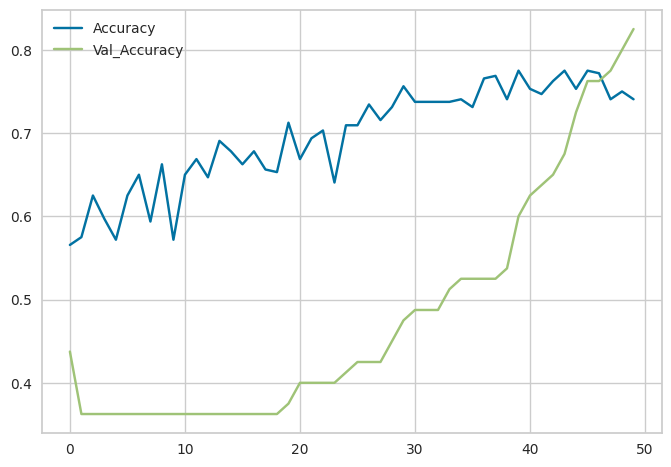

In [39]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend();